# [作業目標]
- 請同學試著使用 pandas.corr() 這個函數來顯示相關係數並加以觀察結果 
- 思考1 : 使用 pandas 有沒有什麼寫法, 可以顯示欄位中最大的幾筆, 以及最小幾筆呢? (Hint: 排序後列出前幾筆/後幾筆)
- 思考2 : 試著使用散佈圖, 顯示相關度最大/最小的特徵與目標值的關係, 如果圖形不明顯, 是否有調整的方法?

# [作業重點]
- 綜合前幾單元的作法, 試試看是否能夠用繪圖顯示出特徵與目標的相關性

In [4]:
# 載入需要的套件
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

# 設定 data_path
dir_data = r'/Users/wall/Desktop/'

In [8]:
# 讀取資料檔
f_app_train = os.path.join(dir_data, 'application_train.csv')
app_train = pd.read_csv(f_app_train)
app_train.shape
print(app_train['NAME_CONTRACT_TYPE'])

0              Cash loans
1              Cash loans
2         Revolving loans
3              Cash loans
4              Cash loans
               ...       
307506         Cash loans
307507         Cash loans
307508         Cash loans
307509         Cash loans
307510         Cash loans
Name: NAME_CONTRACT_TYPE, Length: 307511, dtype: object


In [11]:
# 將只有兩種值的類別型欄位, 做 Label Encoder, 計算相關係數時讓這些欄位可以被包含在內
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

# 檢查每一個 column
for col in app_train:
    if app_train[col].dtype == 'object':
        # 如果只有兩種值的類別型欄位
        if len(list(app_train[col].unique())) <= 2:
            # 就做 Label Encoder, 以加入相關係數檢查
            app_train[col] = le.fit_transform(app_train[col])            
print(app_train.shape)
print(app_train['NAME_CONTRACT_TYPE'])
app_train.head()

(307511, 122)
0         0
1         0
2         1
3         0
4         0
         ..
307506    0
307507    0
307508    0
307509    0
307510    0
Name: NAME_CONTRACT_TYPE, Length: 307511, dtype: int64


,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,0,M,0,1,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,0,F,0,0,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,1,M,1,1,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,0,F,0,1,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,0,M,0,1,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [12]:
# 受雇日數為異常值的資料, 另外設一個欄位記錄, 並將異常的日數轉成空值 (np.nan)
app_train['DAYS_EMPLOYED_ANOM'] = app_train["DAYS_EMPLOYED"] == 365243
print(app_train['DAYS_EMPLOYED_ANOM'])
app_train['DAYS_EMPLOYED'].replace({365243: np.nan}, inplace = True)

# 出生日數 (DAYS_BIRTH) 取絕對值 
app_train['DAYS_BIRTH'] = abs(app_train['DAYS_BIRTH'])

0         False
1         False
2         False
3         False
4         False
          ...  
307506    False
307507     True
307508    False
307509    False
307510    False
Name: DAYS_EMPLOYED_ANOM, Length: 307511, dtype: bool


### 相關係數
一樣，pandas 很貼心地讓我們可以非常容易計算相關係數

In [13]:
# 觀察相關係數
app_train.corr()['TARGET']

SK_ID_CURR                   -0.002108
TARGET                        1.000000
NAME_CONTRACT_TYPE           -0.030896
FLAG_OWN_CAR                 -0.021851
FLAG_OWN_REALTY              -0.006148
                                ...   
AMT_REQ_CREDIT_BUREAU_WEEK    0.000788
AMT_REQ_CREDIT_BUREAU_MON    -0.012462
AMT_REQ_CREDIT_BUREAU_QRT    -0.002022
AMT_REQ_CREDIT_BUREAU_YEAR    0.019930
DAYS_EMPLOYED_ANOM           -0.045987
Name: TARGET, Length: 110, dtype: float64

## 練習時間
列出目標 (TARGET) 與所有欄位之間相關係數，數值最大以及最小各 15 個

通過相關係數的結果觀察有興趣的欄位與 TARGET 或其他欄位的相關係數，並嘗試找出有趣的訊息
- 最好的方式當然是畫圖，舉例來說，我們知道  EXT_SOURCE_3 這個欄位和 TARGET 之間的相關係數是 -0.178919 (在已經這個資料集已經是最負的了！)，那我們可以 EXT_SOURCE_3  為 x 軸， TARGET 為 y 軸，把資料給畫出來

In [90]:
rows = app_train.corr()['TARGET'].index
columns = app_train.corr()['TARGET'].values
corr_dict = {
                "rows": rows,
                "columns": columns
}

corr_df = pd.DataFrame(corr_dict)
corr_df

,rows,columns
0,SK_ID_CURR,-0.002108
1,TARGET,1.000000
2,NAME_CONTRACT_TYPE,-0.030896
3,FLAG_OWN_CAR,-0.021851
4,FLAG_OWN_REALTY,-0.006148
...,...,...
105,AMT_REQ_CREDIT_BUREAU_WEEK,0.000788
106,AMT_REQ_CREDIT_BUREAU_MON,-0.012462
107,AMT_REQ_CREDIT_BUREAU_QRT,-0.002022
108,AMT_REQ_CREDIT_BUREAU_YEAR,0.019930


In [112]:
corr_df_min = corr_df.sort_values(by='columns')[0:15]
print('數值最小的 15 個 :')
print(corr_df_min['rows'][0:15].values)
corr_df_max = corr_df.sort_values(by='columns',ascending=False)[0:15]
print('數值最大的 15 個 :')
print(corr_df_max['rows'][0:15].values)

數值最小的 15 個 :
['EXT_SOURCE_3' 'EXT_SOURCE_2' 'EXT_SOURCE_1' 'DAYS_BIRTH'
 'DAYS_EMPLOYED_ANOM' 'FLOORSMAX_AVG' 'FLOORSMAX_MEDI' 'FLOORSMAX_MODE'
 'AMT_GOODS_PRICE' 'REGION_POPULATION_RELATIVE' 'ELEVATORS_AVG'
 'ELEVATORS_MEDI' 'FLOORSMIN_AVG' 'FLOORSMIN_MEDI' 'LIVINGAREA_AVG']
數值最大的 15 個 :
['TARGET' 'DAYS_EMPLOYED' 'REGION_RATING_CLIENT_W_CITY'
 'REGION_RATING_CLIENT' 'DAYS_LAST_PHONE_CHANGE' 'DAYS_ID_PUBLISH'
 'REG_CITY_NOT_WORK_CITY' 'FLAG_EMP_PHONE' 'REG_CITY_NOT_LIVE_CITY'
 'FLAG_DOCUMENT_3' 'DAYS_REGISTRATION' 'OWN_CAR_AGE'
 'LIVE_CITY_NOT_WORK_CITY' 'DEF_30_CNT_SOCIAL_CIRCLE'
 'DEF_60_CNT_SOCIAL_CIRCLE']


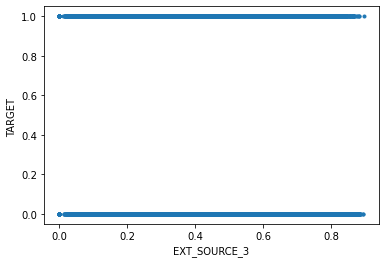

Correlation: nan


In [99]:
#遇到 y 的本質不是連續數值時
plt.plot(app_train['EXT_SOURCE_3'] , app_train['TARGET'], '.')
plt.xlabel('EXT_SOURCE_3')
plt.ylabel('TARGET ')
plt.show()
corr = np.corrcoef(app_train['EXT_SOURCE_3'] , app_train['TARGET'])
print("Correlation: %.4f" % (corr[0][1]))  

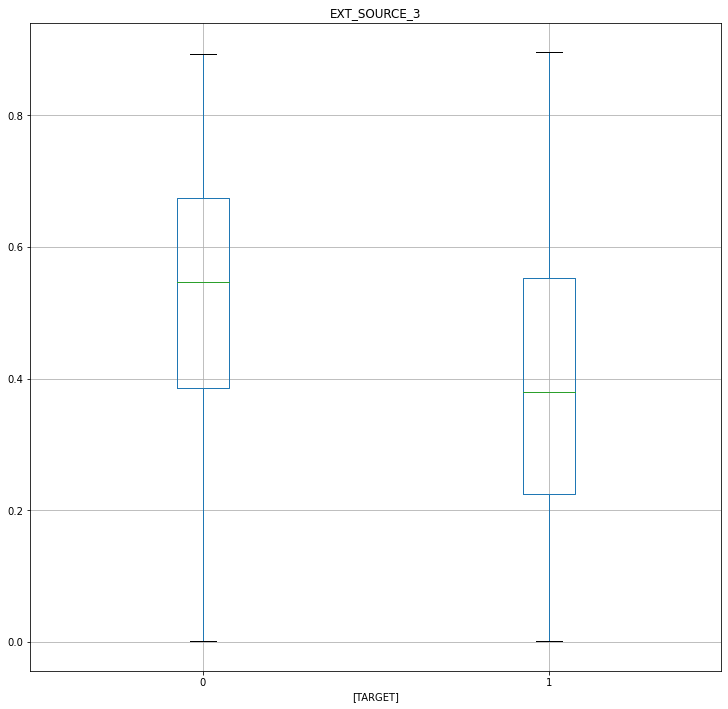

In [98]:
#solution
plt_column = ['EXT_SOURCE_3']
plt_by = ['TARGET']

app_train.boxplot(column=plt_column, by = plt_by, showfliers = False, figsize=(12,12))
plt.suptitle('')
plt.show()

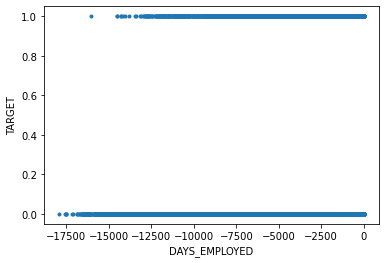

Correlation: nan


In [113]:
#solution
plt.plot(app_train['DAYS_EMPLOYED'] , (app_train['TARGET']), '.')
plt.xlabel('DAYS_EMPLOYED')
plt.ylabel('TARGET')
plt.show()
corr = np.corrcoef(app_train['DAYS_EMPLOYED'] , (app_train['TARGET']))
print("Correlation: %.4f" % (corr[0][1]))  

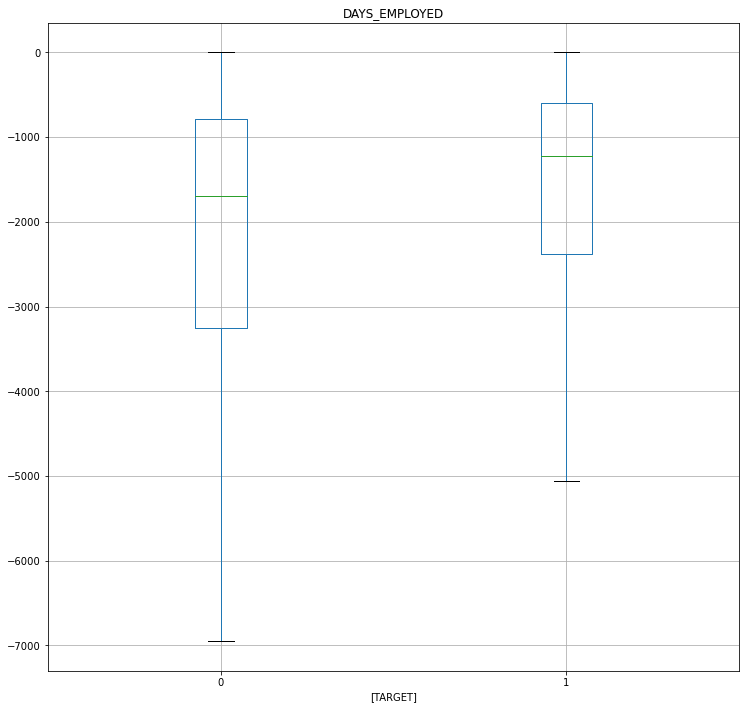

In [114]:
#solution
plt_column = ['DAYS_EMPLOYED']
plt_by = ['TARGET']

app_train.boxplot(column=plt_column, by = plt_by, showfliers = False, figsize=(12,12))
plt.suptitle('')
plt.show()